In [17]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed,FloatSlider
import pandas as pd
from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = [8, 8]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arange, array, linspace, meshgrid

from scipy.integrate import quad,dblquad

from matplotlib import cm

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

A spherical shell 2 cm in radius has density the square of the distance to the top pole (in g/cm$^2$). Write down an integral to compute its total mass. 

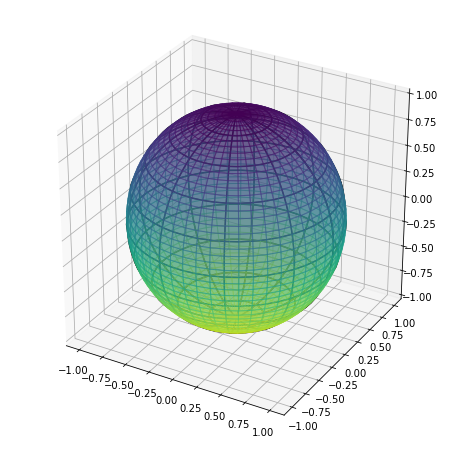

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
u = np.linspace(0,pi,50)
v = np.linspace(0,2*pi,50)
U,V = np.meshgrid(u,v)
mc = cm.viridis((2-2*cos(U))/4)
ax.plot_surface(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=.5,cmap='viridis',facecolors=mc)
ax.plot_wireframe(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=1,color='k',rcount=10,ccount=10);


<p style="padding-bottom:40%;"> </p>

**Solution**

We put the coordinate axes at the center. The density is thus $\rho(x,y,z) = x^2 + y^2 +(2-z)^2$. 

Parametrize the sphere as $$\vec r(u,v) = \begin{bmatrix} 2\sin u \cos v \\ 2 \sin u \sin v \\ 2 \cos u \\ \end{bmatrix}$$ for $0 \leq u \leq \pi, 0 \leq v \leq 2\pi$, which gives the familiar

$$|\vec r_u\times \vec r_v| = 4\sin u.$$

We compute

$$\text{mass} = \iint_\Omega \rho\, dS = \int_0^\pi \int_0^{2\pi} (5-4\cos u)4\sin u \,dv\,du = 80\pi$$ 


<p style="padding-bottom:40%;"> </p>

# Flux Integrals

A **flux integral** of a vector field $\vec F$ through a surface $\Omega$ (somethimes just the "surface integral of a vector field") with orientation $\vec N$ corresponding to parametrization $\vec r:\mathcal D \to \RR^3$ is 

$$\iint_\Omega \vec F\cdot d\vec S = \iint_\Omega \vec F \cdot \vec N\,dS$$

  - Where? on a 2D surface $\Omega$ in $\RR^3$.

  - What? a vector field $\vec F$.

  - How? In the (positive) direction perpendicular to the surface.

$$= \iint_D \vec F(\vec r(u,v))\cdot \frac{r_u\times \vec r_v}{|\vec r_u \times \vec r_v|} |\vec r_u \times \vec r_v|\,dA $$

$$= \iint_D \vec F(\vec r(u,v))\cdot \vec r_u\times \vec r_v\,dA $$

That integrand $\vec F(\vec r(u,v))\cdot \vec r_u\times \vec r_v$ is a triple-product, or, rather, a volume of a parallelopiped, two sides defined by the surface, and one by the vector field.  

<p style="padding-bottom:40%;"> </p>

### Example

Find the flux of the vector field $z\,\vec k$ through the piece of the cone $z=\sqrt{x^2 + y^2}$ below $z=2$, oriented upward.


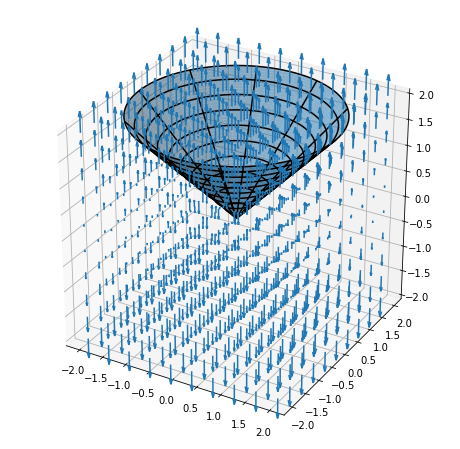

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
u = np.linspace(0,2,100)
v = np.linspace(0,2*pi,100)
U,V = np.meshgrid(u,v)
ax.plot_surface(U*cos(V),U*sin(V),U,alpha=.5)
ax.plot_wireframe(U*cos(V),U*sin(V),U,alpha=1,color='k',rcount=10,ccount=10)
u = v = np.linspace(-2,2,10)
# v = np.linspace(0,2*pi,10)
U,V,W = np.meshgrid(u,v,u)
ax.quiver(U,(V),W,0*U,0*U,W,length=.2);


<p style="padding-bottom:40%;"> </p>

**Solution** Parametrize the cone.

$$ \vec r(u,v) =  u \cos v\,\vec i +  u \sin v\,\vec j +  u\,\vec k$$

$$ 0 \leq u \leq 1$$
$$ 0 \leq v \leq 2\pi$$

$$\vec r_u\times r_v = -u\cos v \,\vec i - u \sin v  \,\vec j + u \,\vec k $$

$$\vec F(\vec r(u,v)) = u\,\vec k $$

$$\text{Flux} = \int_0^{2\pi} \int_0^2 u^2\,du\,dv = \frac{16\pi}{3}$$

<p style="padding-bottom:40%;"> </p>

### Example

Consider the constant vector field $\vec F(x,y,z) = \vec i$. Consider the surfaces

  - $\Omega_1$: piece of the plane $x=0$ for $(0 \leq y,z \leq 1$
  - $\Omega_2$: piece of the surface $x= 3y(1-y)$ for $0 \leq y,z \leq 1$

oriented in the positive $x$-direction. Through which surface is the flux of $\vec F$ greater?

In [20]:
@interact
def _(angle = (-96,6,6),p=(0,3,.5)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,1,20)
    v = np.linspace(0,1,10)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(p*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(p*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    ax.view_init(30,angle)
    u = v = np.linspace(0,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);


interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), FloatSlider(value=1.0…

<p style="padding-bottom:40%;"> </p>

**Solution** $$\Omega_1: \vec r(u,v) = \langle 0,u,v \rangle $$ for $0 \leq u,v \leq 1$. 

$$\vec r_u \times \vec r_v = \langle 0,1,0 \rangle \times \langle 0,0,1 \rangle = \langle 1,0,0 \rangle \vec i $$

$$ \iint_{\Omega_1} \vec F \cdot d\vec S = \int_0^1 \int_0^1 \vec i\cdot \vec i\,du\,dv = 1 $$

$$\Omega_2: \vec r(u,v) = \langle 3u - 3u^2,u,v \rangle $$ for $0 \leq u,v \leq 1$. 

$$\vec r_u \times \vec r_v = \langle 3- 6u,1,0 \rangle \times \langle 0,0,1 \rangle = \langle 1,6u - 3,0 \rangle \vec i + (6u - 3)\,\vec j $$

$$ \iint_{\Omega_2} \vec F \cdot d\vec S = \int_0^1 \int_0^1 \vec i\cdot (\vec i + (6u - 3)\,\vec j)\,du\,dv = 1 $$

So both have the same flux. 

<p style="padding-bottom:40%;"> </p>

### Example

Consider the same example except with changing vector field $\vec F(x,y,z) = x\vec i$. Consider the surfaces

  - $\Omega_1$: piece of the plane $x=0$ for $(0 \leq y,z \leq 1$
  - $\Omega_2$: piece of the surface $x= 3y(1-y)$ for $0 \leq 2,z \leq 1$

oriented in the positive $x$-direction. Through which surface is the flux of $\vec F$ greater?

In [21]:
@interact
def _(angle = (-96,6,6),p=(0,3.,.5)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,1,20)
    v = np.linspace(0,1,15)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(p*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(p*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    u = v = np.linspace(0,1,7)
    # v = np.linspace(0,2*pi,10)
    ax.view_init(30,angle)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,U,0*U,0*U,length=.2);


interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), FloatSlider(value=1.5…

<p style="padding-bottom:40%;"> </p>

**Solution** $$\Omega_1: \vec r(u,v) = \langle 0,u,v \rangle $$ for $0 \leq u,v \leq 1$. 

$$\vec r_u \times \vec r_v = \langle 0,1,0 \rangle \times \langle 0,0,1 \rangle = \langle 1,0,0 \rangle \vec i $$

$$\iint_{\Omega 1} \vec F \cdot d\vec S = \int_0^1 \int_0^1 0\vec i\cdot \vec i\,du\,dv = 0 $$

$$\Omega_2: \vec r(u,v) = \langle 3u - 3u^2,u,v \rangle $$ for $0 \leq u,v \leq 1$. 

$$\vec r_u \times \vec r_v = \langle 3- 6u,1,0 \rangle \times \langle 0,0,1 \rangle = \langle 1,6u - 3,0 \rangle \vec i + (6u - 3)\,\vec j $$

$$\iint_{\Omega 2} \vec F \cdot d\vec S = \int_0^1 \int_0^1 (3u - u^2)\,\vec i\cdot (\vec i + (6u - 3)\,\vec j)\,du\,dv = \frac12 $$

So the second surface yields a greater flux.

<p style="padding-bottom:40%;"> </p>

## Curl and Div in 2D

If $\vec F(x,y) = \langle P(x,y),Q(x,y) \rangle $, then 

$$\operatorname{curl} \vec F (x,y) = Q_x - P_y = \text{ "circulation density"}$$

  - positive $\leftrightarrow$ counterclockwise spin
  - negative $\leftrightarrow$ clockwise spin
  - zero $\leftrightarrow$ irrotational

$$\operatorname{div} \vec F (x,y) = P_x + Q_y = \text{ "flux density"}$$
  - positive $\leftrightarrow$ expansion
  - negative $\leftrightarrow$ compression
  - zero $\leftrightarrow$ incompressibility

In [22]:
@interact
def _(colorplot=["None","Curl","Divergence"]):
    x = y = np.linspace(-1,1,20)
    x,y = np.meshgrid(x,y)
    plt.figure(figsize=(7,7))
    plt.quiver(x,y,x**2 - x*y,y**2 - x**2);
    x = y = np.linspace(-1,1,100)
    x,y = np.meshgrid(x,y)
    if colorplot == "Divergence":
        plt.pcolormesh(x,y,2*x + y,alpha=.3)
        # plt.contourf(x,y,2*x + y,alpha=.3)
#         plt.colorbar()
    elif colorplot == "Curl":
        plt.pcolormesh(x,y,-x ,alpha=.3)
    plt.colorbar(alpha=.3)
    for c in 'xy':
    #         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
#     t= np.linspace(0,1,100)    
    # plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
    # plt.arrow(2/3,0,.001,.001,width=.03,color='b')
    plt.plot([0,0],[-1,1],'k')
    plt.plot([-1,1],[0,0],'k')
    # plt.plot((2/3+1/3*sin(6*pi*t))*cos(2*pi*t),sin(2*pi*t),'b',lw=3);

interactive(children=(Dropdown(description='colorplot', options=('None', 'Curl', 'Divergence'), value='None'),…

<p style="padding-bottom:40%;"> </p>

## Example

Look at the vector field below. At the point $(.2,.2)$ (center of the red circle), is the curl positive, negative or 0?

How about the divergence?

In [25]:
@interact(zoom=(.2,1,.1),th=(0,pi/2,pi/10))
def _(zoom=0,th=pi/2,P=fixed(lambda x,y: -y - x),Q=fixed(lambda x,y: x - y)):
    plt.figure(figsize=(7,7))
    x = y = np.concatenate([arange(.2,.2+1.2*zoom,.05),arange(.2,.2-1.2*zoom,-.05)])
    x,y = meshgrid(x,y)
    plt.quiver(x,y,P(x,y),Q(x,y))
    plt.plot([0,0],[-2,2],'k')
    plt.plot([-2,2],[0,0],'k')
    t = linspace(0,2*pi,57)
    plt.plot(.1*cos(t)+.2,.1*sin(t)+.2,'r',lw=2)
    plt.quiver(.1*cos(t)+.2,.1*sin(t)+.2,.1*cos(t)*cos(th)-.1*sin(t)*sin(th),.1*sin(t)*cos(th)+.1*cos(t)*sin(th),color='r',alpha=(zoom < .4) and 1 or 0)
    for c in 'xy':
        getattr(plt,f"{c}lim")(.2-zoom,.2+zoom)
    

interactive(children=(FloatSlider(value=0.2, description='zoom', max=1.0, min=0.2), FloatSlider(value=1.570796…

The vector field above is $$\langle -y-x,x-y \rangle.$$ Compute these exactly.

<p style="padding-bottom:40%;"> </p>

**Solution** The curl is $1 - (-1) = 2 >0$ and divergence is $-1 - 1 = -2 < 0$.

## Example

At the point $(-1,1/2)$ determine if each of the divergence and scalar curl is positive, negative or 0.

Try to determine this before revealing the formula. **Use the slider to see the dots flow. Execute the cell over to get a new problem.**

In [29]:
from numpy.random import randn, randint
data = np.array((-1 + .14*randn(113),.5 + .14*randn(113)))

def eul(pt,F,dt=1/25):
    out = pt + dt*F(*pt)
    for x in out:
        if np.abs(x) > 3:
            out = pt
            # out[np.random.randint(0,3)] = np.random.randint(0,2)
#             out[2] = -1
            break
    return out

In [34]:
basefunc = [lambda x,y: 1 + 0*x, lambda x,y: x**2, lambda x,y: x, lambda x,y: y, lambda x,y: y**2]
basefunctex = ("1","x^2","x","y","y^2")
f,g = randint(0,len(basefunc) - 1),randint(0,len(basefunc) - 1)
pm1,pm2 = randint(0,2),randint(0,2)
d2 = d2 = data.copy()
d = []
for i in range(101):
    d2 = np.apply_along_axis(lambda x: eul(x,lambda x,y: np.array(((-1)**pm1*basefunc[f](x,y),(-1)**pm2*basefunc[g](x,y))),.01),0,d2)
    d.append(d2)
@interact(n=(0,100,1))
def _(n=0,formula=False):
#     d2 = data.copy()
#     for i in range(n):
#         d2 = np.apply_along_axis(lambda x: eul(x,F,.01),0,d2)
    x = y = linspace(-2,2,16)
    x,y = meshgrid(x,y)
    plt.scatter(-1,1/2,s=100,color='r')
    plt.scatter(*d[n])
    plt.quiver(x,y,(-1)**pm1*basefunc[f](x,y),(-1)**pm2*basefunc[g](x,y));
    if formula:
        plt.title(f"$\\langle {['','-'][pm1]}{basefunctex[f]},{['','-'][pm2]}{basefunctex[g]} \\rangle$",fontsize=20);
    for c in 'xy':
        getattr(plt,f"{c}lim")((-2,2))

interactive(children=(IntSlider(value=0, description='n'), Checkbox(value=False, description='formula'), Outpu…

<p style="padding-bottom:40%;"> </p>

##  In $\RR^3$

$$ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z) \,\vec k $$ 

$$\operatorname{div}\vec F = \nabla \cdot \vec F = P_x  + Q_y  + R_z $$

$$\operatorname{curl}\vec F = \nabla \times \vec F = \begin{vmatrix}
\vec i & \vec j & \vec k \\ \partial_x & \partial_y & \partial_z \\ P & Q & R \\ \end{vmatrix} = (R_y - Q_z) \,\vec i + (P_z - R_x) \,\vec j + (Q_x - P_y) \,\vec k$$ 

## Example

Compute the divergence and curl of $$ \vec F(x,y,z) = xy \,\vec i +  (5 - z^2 y)\,\vec j +  (x^2 + y^2)\,\vec k $$ at the point $(1,-2,3)$.

<p style="padding-bottom:40%;"> </p>

**Solution**$$\nabla \cdot \vec F (1,-2,3) = y - z^2 \mid_{(1,-2,3)} = -11 $$

$$\nabla \times \vec F (1,-2,3) = \langle -2z, -2x, -y \mid_{(1,-2,3)} = \langle -6,-2,2 \rangle $$